<a href="https://colab.research.google.com/github/WheelerMLClub/DataScience/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
#PCA Interactive
#https://setosa.io/ev/principal-component-analysis/

import pandas as pd
data = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data = data.iloc[:1000]

In [46]:
#Step 0 Standarize!
from sklearn import preprocessing
data = preprocessing.scale(data).T
data.shape
labels = data[0,:]
labels.shape


(1000,)

In [47]:
#Step 1 Compute Covariance Matrix
import numpy as np
data_array = np.array(data)
data[0,:] *= 100
covar = np.dot(data_array,np.transpose(data_array))

In [48]:
#Step 2 Compute eigenvalues M(*v = l*v find l and v where l is a constant and v a vector)
import scipy.linalg as la

eigenvalues,eigenvectors = la.eig(covar)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

In [49]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(785,)
(785, 785)


In [82]:
#Sort eigenvectors by eigenvalues and choose the first k eigenvectors
k=100
vec = eigenvectors[np.argsort(eigenvalues)][::-1][:k]

In [83]:
vec.shape

(100, 785)

In [84]:
#Project points onto smaller subspace
final_data = np.dot(vec,data_array)
final_data = final_data.T
print(final_data.shape)

(1000, 100)


In [85]:
# We can tell which values were most important too:
print(np.argsort(eigenvalues)[::-1][:10])
print(np.sort(eigenvalues)[::-1][:10])

[0 1 2 3 4 5 6 7 8 9]
[40306.66038149 31400.59527592 27924.83437036 19838.2828953
 17304.51686495 15944.12954653 15342.21721117 12599.12821976
 11747.8421975  10258.37606286]


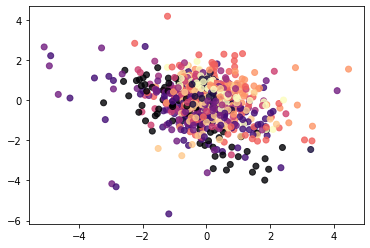

In [94]:
import matplotlib.pyplot as plt
plt.scatter(final_data[:,-1],final_data[:,-2],c=np.array(labels).reshape(-1),alpha=.8,cmap="magma")